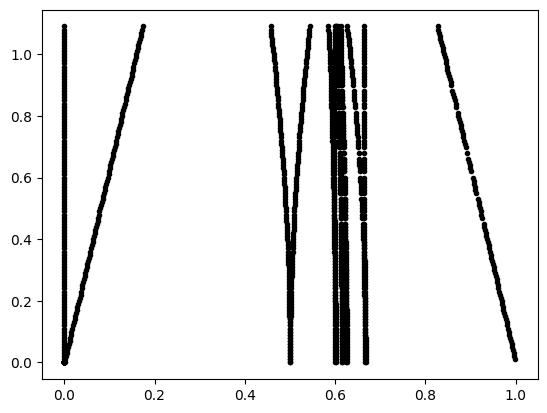

In [25]:
import numpy as np
import matplotlib.pyplot as plt

Niter = 1000
t0 = 0

Win = [0, 1/2, 3/5, 8/13, 5/8, 2/3, 1, np.inf]
Wc = np.zeros(7)
epsilon = 5e-04

# loop over omega and K starting from 0
K = np.arange(0, 1.1, 0.01)
lk = len(K)
Omega = np.arange(0, 1, 0.001)
lo = len(Omega)

Kb = np.zeros((lk, len(Win)))
Ob = np.zeros((lk, len(Win)))
Ke = np.zeros((lk, len(Win)))
Oe = np.zeros((lk, len(Win)))

for k in range(lk):
    n = 1
    for o in range(lo):
        kf = K[-k]
        om = Omega[o]

        t = t0

        for s in range(1, Niter + 1):
            t = t + om - kf/(2*np.pi) * np.sin(2*np.pi*t)

        W = (t - t0) / s

        if abs(W - Win[n-1]) < epsilon:
            Kb[k, n-1] = kf
            Ob[k, n-1] = om
            Wp = Win[n-1]
            Wc[n-1] = 1
            n = n + 1

        if n > 1 and Wc[n-2] == 1:
            if abs(W - Wp) > epsilon:
                Ke[k, n-2] = kf
                Oe[k, n-2] = om
                Wc[n-2] = 0

# Plotting the results
plt.plot(Ob.flatten(), Kb.flatten(), '.k')
plt.plot(Oe.flatten(), Ke.flatten(), '.k')
plt.show()


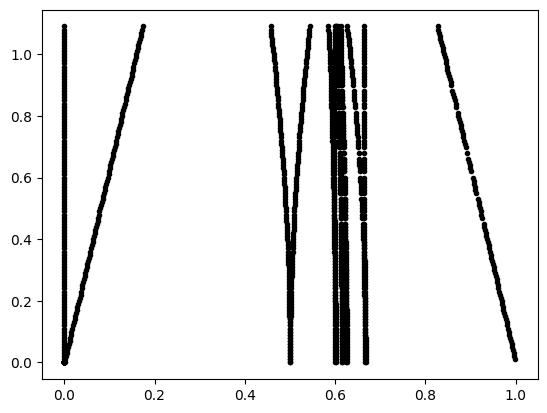

In [24]:
import numpy as np
import matplotlib.pyplot as plt

Niter = 1000
t0 = 0

Win = np.array([0, 1/2, 3/5, 8/13, 5/8, 2/3, 1, np.inf])
epsilon = 5e-04

K = np.arange(0, 1.1, 0.01)[::-1]  # Reverse K
Omega = np.arange(0, 1, 0.001)

Kb = np.zeros((len(K), len(Win)))
Ob = np.zeros((len(K), len(Win)))
Ke = np.zeros((len(K), len(Win)))
Oe = np.zeros((len(K), len(Win)))

for k, kf in enumerate(K):
    n = 1
    Wc = np.zeros(len(Win))
    for o, om in enumerate(Omega):
        t = t0

        for s in range(1, Niter + 1):
            t += om - kf / (2 * np.pi) * np.sin(2 * np.pi * t)

        W = (t - t0) / Niter

        if n <= len(Win) and abs(W - Win[n-1]) < epsilon:
            Kb[k, n-1] = kf
            Ob[k, n-1] = om
            Wc[n-1] = 1
            n = n + 1

        if n > 1 and Wc[n-2] == 1 and abs(W - Win[n-2]) > epsilon:
            Ke[k, n-2] = kf
            Oe[k, n-2] = om
            Wc[n-2] = 0

plt.plot(Ob.flatten(), Kb.flatten(), '.k')
plt.plot(Oe.flatten(), Ke.flatten(), '.k')
plt.show()


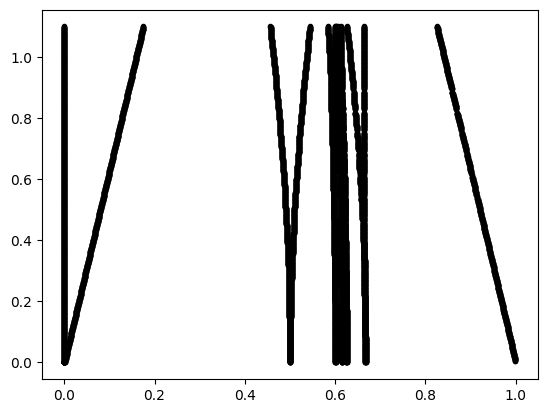

In [28]:
from joblib import Parallel, delayed
import numpy as np
import matplotlib.pyplot as plt

def compute(kf, Win, epsilon, Niter, Omega, t0):
    n = 1
    Wc = np.zeros(len(Win))
    local_Kb = np.zeros(len(Win))
    local_Ob = np.zeros(len(Win))
    local_Ke = np.zeros(len(Win))
    local_Oe = np.zeros(len(Win))

    for om in Omega:
        t = t0
        for s in range(1, Niter + 1):
            t += om - kf / (2 * np.pi) * np.sin(2 * np.pi * t)

        W = (t - t0) / Niter

        if n <= len(Win) and abs(W - Win[n-1]) < epsilon:
            local_Kb[n-1] = kf
            local_Ob[n-1] = om
            Wc[n-1] = 1
            n += 1

        if n > 1 and Wc[n-2] == 1 and abs(W - Win[n-2]) > epsilon:
            local_Ke[n-2] = kf
            local_Oe[n-2] = om
            Wc[n-2] = 0

    return local_Kb, local_Ob, local_Ke, local_Oe

Niter = 1000
t0 = 0
Win = np.array([0, 1/2, 3/5, 8/13, 5/8, 2/3, 1, np.inf])
epsilon = 5e-04
K = np.arange(0, 1.1, 0.001)[::-1]
Omega = np.arange(0, 1, 0.001)

results = Parallel(n_jobs=-1)(delayed(compute)(kf, Win, epsilon, Niter, Omega, t0) for kf in K)

# Aggregate results
Kb = np.array([res[0] for res in results])
Ob = np.array([res[1] for res in results])
Ke = np.array([res[2] for res in results])
Oe = np.array([res[3] for res in results])

plt.plot(Ob.flatten(), Kb.flatten(), '.k')
plt.plot(Oe.flatten(), Ke.flatten(), '.k')
plt.show()
